<a href="https://colab.research.google.com/github/Shuayb007/CybersecurityBreach/blob/main/Data_breach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE PROBLEM STATEMENT

# IMPORTING LIBRARIES AND EXPLORING THE DATA

In [ ]:

# pyLDAavis for topic visualization
!pip install --upgrade pip
!pip install --upgrade jupyter notebook
!pip install pyLDAvis



     |████████████████████████████████| 1.7 MB 6.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 9.9 MB 10.1 MB/s            
     |████████████████████████████████| 428 kB 56.9 MB/s            
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Attempting uninstall: notebook
    Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires notebook~=5.3.0; python_version >= "3.0", but you have notebook 6.4.5 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python

     |████████████████████████████████| 1.7 MB 8.2 MB/s            
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing wheel metadata (pyproject.toml) ... done
     |████████████████████████████████| 15.7 MB 58 kB/s              
     |████████████████████████████████| 11.3 MB 42.0 MB/s            
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=41a916fe771fff999f378a50dab930516f24ac2cbc1f857f2217cb39f8759cb0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip'

In [ ]:
# import key libraries
import pandas as pd # for dataframe manupulation
import numpy as np # for multidimentuional array manupulation
import matplotlib.pyplot as plt # for data visualizations
import seaborn as sns
from pprint import pprint
from wordcloud import WordCloud, STOPWORDS # for word data visualization
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import spacy
import gensim
import gensim.corpora as corpora #for developing corpus
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel #for checking model cohenrency or performance
import pyLDAvis

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# load the data
breach_df = pd.read_csv('/content/drive/MyDrive/Shuaib/Data Breach Chronology.csv')

In [ ]:
# Let's view the dataset 
breach_df

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,3/3/2006,PayDay OK LLC,NaN,New Jersey,HACK,BSF,88,The company's website was breached sometime ar...,California Attorney General,https://oag.ca.gov/,2006,40.058324,-74.405661,NaN,NaN,NaN
1,1/4/2012,"SF Fire Credit Union, Pacifica-Coastside Credi...",San Francisco,California,PORT,BSF,0,"The December 29, 2011 theft of a laptop from a...",California Attorney General,NaN,2012,37.774930,-122.419416,NaN,NaN,NaN
2,2/18/2012,"BDO USA, Rubio's Restaurants, Inc.",San Diego,California,PORT,BSR,0,BDO was contracted by Rubio's to perform finan...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
3,2/22/2012,"DHI Mortgage Company, Ltd.",Austin,Texas,HACK,BSF,0,"On February 10, 2012, DHI Mortgage became awar...",California Attorney General,NaN,2012,30.267153,-97.743061,NaN,NaN,NaN
4,3/12/2012,"Impairment Resources, LLC",San Diego,California,PORT,MED,"14,000",An office burglary on New Year's Eve 2011 resu...,California Attorney General,NaN,2012,32.715329,-117.157255,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9010,11/20/2009,"Mark D. Lurie, MD",NaN,CA,PHYS,MED,5166,Location of breached information: Theft\nBusin...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2009,NaN,NaN,NaN,NaN,NaN
9011,11/17/2009,Health Services for Children with Special Need...,NaN,DC,PHYS,MED,3800,Location of breached information: Loss\nBusine...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2009,NaN,NaN,NaN,NaN,NaN
9012,10/30/2009,Alaska Department of Health and Social Services,NaN,AK,PHYS,MED,501,Location of breached information: Theft\nBusin...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2009,NaN,NaN,NaN,NaN,NaN
9013,10/28/2009,"Mid America Kidney Stone Association, LLC",NaN,MO,PHYS,MED,1000,Location of breached information: Theft\nBusin...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2009,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dataframe information
breach_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9015 entries, 0 to 9014
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date Made Public         9015 non-null   object 
 1   Company                  9015 non-null   object 
 2   City                     5690 non-null   object 
 3   State                    8436 non-null   object 
 4   Type of breach           8926 non-null   object 
 5   Type of organization     9015 non-null   object 
 6   Total Records            9009 non-null   object 
 7   Description of incident  9012 non-null   object 
 8   Information Source       8962 non-null   object 
 9   Source URL               3607 non-null   object 
 10  Year of Breach           9015 non-null   int64  
 11  Latitude                 6541 non-null   float64
 12  Longitude                6541 non-null   float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14             

In [ ]:
# check for null values
breach_df.isnull().sum()

Date Made Public              0
Company                       0
City                       3325
State                       579
Type of breach               89
Type of organization          0
Total Records                 6
Description of incident       3
Information Source           53
Source URL                 5408
Year of Breach                0
Latitude                   2474
Longitude                  2474
Unnamed: 13                9015
Unnamed: 14                9015
Unnamed: 15                9014
dtype: int64

 **How many unique elements are present in the 'Type of breach' column?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


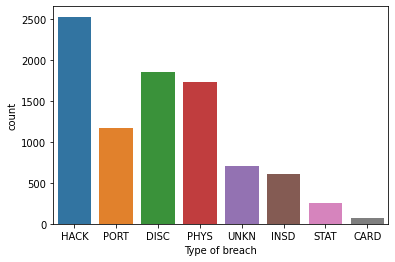

In [ ]:
# checking for unique elements in sentiment
sns.countplot(breach_df['Type of breach'])


# PERFORMING DATA CLEANING (REMOVE PUNCTUATIONS FROM DESCRIPTION OF INCIDENT)


In [ ]:
# creating a dictionary 
# with column name and data type
data_types_dict = {'Description of incident': str}
  
# we will change the data type 
# of id column to str by giving
# the dict to the astype method
breach_df = breach_df.astype(data_types_dict)
  
# checking the data types
# using df.dtypes method
breach_df.dtypes

Date Made Public            object
Company                     object
City                        object
State                       object
Type of breach              object
Type of organization        object
Total Records               object
Description of incident     object
Information Source          object
Source URL                  object
Year of Breach               int64
Latitude                   float64
Longitude                  float64
Unnamed: 13                float64
Unnamed: 14                float64
Unnamed: 15                 object
dtype: object

In [ ]:
breach_df['Description of incident'][2]

"BDO was contracted by Rubio's to perform financial auditing services. \xa0A BDO employee accidentally removed one or more CD-ROMs from the office. \xa0The CD-ROM or CD-ROMs contained a list of Rubio's workers' compensation claimants and a list of people who owned equity shares in Rubio's Restaurants, Inc. \xa0The CD-ROM or CD-ROMS appear to have been stolen from the BDO employee's vehicle. \xa0The workers' compensation information contained names, claim numbers, medical status, and date of loss. \xa0The medical status information included the employees' claim for injuries or illnesses. \xa0No Social Security numbers were involved. \xa0The partial equity roll list contained names and Social Security numbers."

In [ ]:
import re
# Removing punctuations in string using regex with sub to search and replace patterns in the string
#Removing punctuations, alphanumeric, and digits from the column we're interested in

data_types_dict = {'Description of incident': str}

breach_df = breach_df.astype(data_types_dict)
  

def clean_description(text):
    #removing punctuations and unicode characters
    text = re.sub(r'[?!.;:,#@-]', '', text)
    
    text = re.sub(r'[^\w\s\d][a-z]', '', text)
    
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    #converting all words to lowercase
    text = text.lower()
    
    return text


In [ ]:
# Let's remove punctuations from our dataset using regular expressions
breach_df['Data'] = breach_df['Description of incident'].apply(clean_description)

In [ ]:
breach_df['Data'][2]

"bdo was contracted by rubio to perform financial auditing services a bdo employee accidentally removed one or more cdroms from the office the cdrom or cdroms contained a list of rubio workers' compensation claimants and a list of people who owned equity shares in rubio restaurants inc the cdrom or cdroms appear to have been stolen from the bdo employee vehicle the workers' compensation information contained names claim numbers medical status and date of loss the medical status information included the employees' claim for injuries or illnesses no social security numbers were involved the partial equity roll list contained names and social security numbers"

# TASK #4: PERFORM DATA CLEANING (REMOVE STOPWORDS)

In [ ]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https', 'and', 'the', 'have', 'been', 'for', 'to', 'were', 'by', 'a', 'in', 'an','at', 'may''or'])
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year', 'https'])

In [ ]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# apply pre-processing to the text column
breach_df['Data'] = breach_df['Description of incident'].apply(preprocess)
# join the words into a string
breach_df['Data'] = breach_df['Data'].apply(lambda x: " ".join(x))

In [ ]:
breach_df['Data'][2]

'bdo contracted rubio perform financial auditing services bdo employee accidentally removed one roms office rom roms contained list rubio workers compensation claimants list people owned equity shares rubio restaurants inc rom roms appear stolen bdo employee vehicle workers compensation information contained names claim numbers medical status date loss medical status information included employees claim injuries illnesses social security numbers involved partial equity roll list contained names social security numbers'

# TASK #6: VISUALIZE CLEANED DATASETS

In [ ]:
breach_df['Data']

0       company website breached sometime around febru...
1       december theft laptop parked car san francisco...
2       bdo contracted rubio perform financial auditin...
3       february dhi mortgage became aware software se...
4       office burglary new eve resulted loss hardware...
                              ...                        
9010    location breached information theft business a...
9011    location breached information loss business as...
9012    location breached information theft business a...
9013    location breached information theft business a...
9014    location breached information theft business a...
Name: Data, Length: 9015, dtype: object

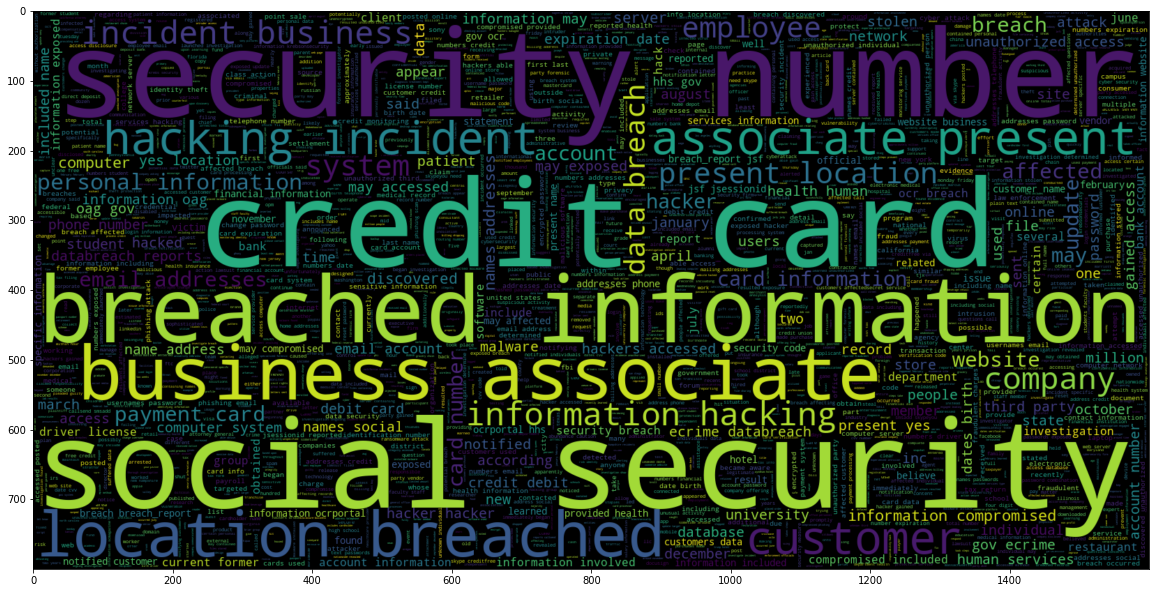

In [ ]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 10000 , width = 1600 , height = 800).generate(" ".join(breach_df[breach_df['Type of breach'] == 'HACK']['Data']))
plt.imshow(wc, interpolation = 'bilinear');


# TASK #7: PHRASE MODELLING : BIGRAM AND TRIGRAM

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(breach_df['Data']))

print(data_words[:1])

[['company', 'website', 'breached', 'sometime', 'around', 'february', 'hacker', 'attempt', 'gain', 'access', 'certain', 'customers', 'private', 'information', 'social', 'security', 'numbers', 'names', 'addresses', 'bank', 'account', 'names', 'bank', 'account', 'numbers', 'may', 'compromised', 'least', 'individuals', 'affected']]


In [ ]:
#bigrams and trigrams are words that usually comein pairs and thrice, but referring to the same things

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['company', 'website', 'breached', 'sometime_around', 'february', 'hacker', 'attempt', 'gain', 'access', 'certain', 'customers', 'private', 'information', 'social', 'security', 'numbers', 'names', 'addresses', 'bank', 'account', 'names', 'bank', 'account', 'numbers', 'may', 'compromised', 'least', 'individuals', 'affected']


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
#lematization of the words,which simply means to break down some words into their root words, eg walking to walk. 
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_nostops = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_nostops, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:3])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

[['company', 'website', 'breach', 'hacker', 'attempt', 'gain', 'access', 'certain', 'customer', 'private', 'information', 'social', 'security', 'number', 'address', 'account', 'account', 'number', 'may', 'compromised', 'least', 'individual', 'affect'], ['theft', 'laptop', 'park', 'car', 'result', 'loss', 'personal', 'information', 'information', 'use', 'preparation', 'merger', 'fire', 'account', 'holder', 'name', 'social', 'security', 'number', 'date', 'birth', 'address', 'account', 'information'], ['contract', 'rubio', 'perform', 'financial', 'auditing', 'service', 'bdo', 'employee', 'accidentally', 'remove', 'rom', 'office', 'rom', 'rom', 'contain', 'list', 'rubio', 'claimant', 'list', 'people', 'own', 'equity', 'share', 'rubio', 'rom', 'appear', 'steal', 'bdo', 'employee', 'vehicle', 'information', 'contain', 'name', 'claim', 'number', 'medical', 'status', 'loss', 'medical', 'status', 'information', 'include', 'employee', 'claim', 'injury', 'illnesse', 'social', 'security', 'number'

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

# TASK #8: DATA PREPROCESSING, CORPUS AND DICTIONARY CREATION

In [ ]:
# A dictionary and corpus are input parameters in the LDA algorithm we have selected for this model

# Creating a Dictionary
id2word = corpora.Dictionary(data_lemmatized)

id2word[3]

'affect'

In [ ]:
#Gensim creates a unique id for each word in the document and also includes the frequency of occurence

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:3])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1)], [(1, 2), (2, 1), (13, 3), (16, 1), (18, 1), (19, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1)], [(13, 2), (16, 3), (18, 2), (19, 2), (27, 1), (29, 2), (36, 1), (37, 1), (38, 1), (39, 2), (40, 2), (41, 1), (42, 3), (43, 1), (44, 3), (45, 2), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 3), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 4), (61, 3), (62, 1), (63, 1), (64, 2), (65, 1), (66, 1)]]


In [ ]:

# to see the words and frequency of occurrence
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]


[[('access', 1),
  ('account', 2),
  ('address', 1),
  ('affect', 1),
  ('attempt', 1),
  ('breach', 1),
  ('certain', 1),
  ('company', 1),
  ('compromised', 1),
  ('customer', 1),
  ('gain', 1),
  ('hacker', 1),
  ('individual', 1),
  ('information', 1),
  ('least', 1),
  ('may', 1),
  ('number', 2),
  ('private', 1),
  ('security', 1),
  ('social', 1),
  ('website', 1)],
 [('account', 2),
  ('address', 1),
  ('information', 3),
  ('number', 1),
  ('security', 1),
  ('social', 1),
  ('birth', 1),
  ('car', 1),
  ('date', 1),
  ('fire', 1),
  ('holder', 1),
  ('laptop', 1),
  ('loss', 1),
  ('merger', 1),
  ('name', 1),
  ('park', 1),
  ('personal', 1),
  ('preparation', 1),
  ('result', 1),
  ('theft', 1),
  ('use', 1)],
 [('information', 2),
  ('number', 3),
  ('security', 2),
  ('social', 2),
  ('loss', 1),
  ('name', 2),
  ('accidentally', 1),
  ('appear', 1),
  ('auditing', 1),
  ('bdo', 2),
  ('claim', 2),
  ('claimant', 1),
  ('contain', 3),
  ('contract', 1),
  ('employee', 3)

In [ ]:
len(corpus)

9015

# TASK #7: ALGORITHM SELECTION AND MODEL EVALUATION

In [ ]:
#I will be using the Latent Dirichlet Allocation (LDA) from Gensim package along with the Mallet’s implementation (via Gensim). 
#Mallet has an efficient implementation of the LDA. It is known to run faster and gives better topics segregation.

In [ ]:
#We have everything required to train the LDA model. In addition to the corpus and dictionary, you need to provide the number of topics as well.
#Apart from that, alpha and beta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.
#chunksize is the number of documents to be used in each training chunk. 
#update_every determines how often the model parameters should be updated 
#passes is the total number of training passes.

lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)                                        

In [ ]:
# Print the Keywords in the base topic model
pprint(lda_model1.print_topics())
doc_lda = lda_model[corpus]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model1.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model1, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 12
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(corpus, num_of_docs*0.75), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()


ADJUSTING THE MODEL PARAMETERS BASED ON THE COHERENCY SCORE 

In [ ]:


# Building the LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=6, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
# Print the Keyword in the 6 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.151*"hack" + 0.050*"information" + 0.024*"datum" + 0.017*"company" + '
  '0.017*"incident" + 0.015*"say" + 0.012*"compromise" + 0.012*"provide" + '
  '0.011*"individual" + 0.010*"service"'),
 (1,
  '0.099*"patient" + 0.055*"record" + 0.039*"medical" + 0.029*"health" + '
  '0.015*"insurance" + 0.013*"hospital" + 0.010*"find" + 0.009*"document" + '
  '0.009*"service" + 0.007*"care"'),
 (2,
  '0.180*"access" + 0.170*"unauthorized" + 0.164*"disclosure" + '
  '0.063*"information" + 0.012*"email" + 0.006*"send" + 0.005*"receive" + '
  '0.005*"member" + 0.004*"could" + 0.004*"database"'),
 (3,
  '0.166*"breach" + 0.162*"business" + 0.162*"location" + 0.162*"associate" + '
  '0.162*"present" + 0.134*"information" + 0.014*"loss" + 0.001*"unknown" + '
  '0.001*"determine" + 0.000*"tax"'),
 (4,
  '0.038*"card" + 0.038*"account" + 0.031*"customer" + 0.027*"credit" + '
  '0.018*"use" + 0.015*"system" + 0.015*"may" + 0.015*"hacker" + 0.013*"email" '
  '+ 0.013*"address"'),
 (5,
  '0.353*"t

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

# Visualize the topics
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

TypeError: ignored

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -6.746906750894709

Coherence Score:  0.48948626799677264


In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

NameError: ignored